In [27]:
from fits_reader import *
import pylab as plt

In [28]:
files = find_files('../Convolutional-LSTM-in-Tensorflow/Data/', pattern='*OFF.fits', pair=True)
#files = find_pairs('../Convolutional-LSTM-in-Tensorflow/train_data')
batch = load_batch(40200, files, 0, with_y=True, normalize='max')
batch = pad_batch(batch)

(40200, 1, 512, 1)


(40200, 34, 512, 1)


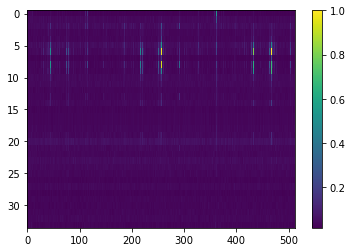

In [29]:
print(batch.shape)
def pad_batch(batch, l=16, p=1):
    pad = np.mean(batch[:,l-1:l+1, :, :], axis=1, keepdims=True)
    print(pad.shape)
    padded = np.concatenate([batch[:,:l, :, :], pad, pad, batch[:,l:, :, :]], axis=1)
    return padded

plt.imshow(batch[19].squeeze(), aspect='auto')
plt.colorbar()
plt.show()

In [36]:
batch.shape
def make_movie(frame, l=8):
    L = frame.shape[0]
    movie = np.stack([frame[i:i+l] for i in range(L-l)], axis=0)
    return movie
movie_batch = np.stack([make_movie(frame) for frame in batch], axis=0)
print(movie_batch.shape)

KeyboardInterrupt: 

In [33]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt
from keras.utils import multi_gpu_model

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(1, 3),
                   input_shape=(None, 8, 512, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(1, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(1, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq = multi_gpu_model(seq, gpus=2)
seq.compile(loss='binary_crossentropy', optimizer='adadelta')



In [34]:
seq.fit(movie_batch[:50000, :-1], movie_batch[:50000, 1:], batch_size=32,
        epochs=5, validation_split=0.05)

Train on 38190 samples, validate on 2010 samples
Epoch 1/5


ResourceExhaustedError: OOM when allocating tensor with shape[25,16,8,512,40] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: replica_0_1/sequential_2/conv_lst_m2d_7/transpose = Transpose[T=DT_FLOAT, Tperm=DT_INT32, _device="/job:localhost/replica:0/task:0/device:GPU:0"](replica_0_1/sequential_2/batch_normalization_6/cond/Merge, replica_0_1/sequential_2/conv_lst_m2d_5/transpose/perm)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: replica_1_1/sequential_2/conv3d_2/Sigmoid/_1455 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:1", send_device_incarnation=1, tensor_name="edge_9915_replica_1_1/sequential_2/conv3d_2/Sigmoid", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'replica_0_1/sequential_2/conv_lst_m2d_7/transpose', defined at:
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-33-26a27386709b>", line 34, in <module>
    seq = multi_gpu_model(seq, gpus=2)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/keras/utils/multi_gpu_utils.py", line 226, in multi_gpu_model
    outputs = model(inputs)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/keras/engine/base_layer.py", line 460, in __call__
    output = self.call(inputs, **kwargs)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/keras/engine/network.py", line 574, in call
    output_tensors, _, _ = self.run_internal_graph(inputs, masks)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/keras/engine/network.py", line 731, in run_internal_graph
    output_tensors = to_list(layer.call(computed_tensor, **kwargs))
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/keras/layers/convolutional_recurrent.py", line 958, in call
    initial_state=initial_state)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/keras/layers/convolutional_recurrent.py", line 376, in call
    input_length=timesteps)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 2779, in rnn
    inputs = tf.transpose(inputs, (axes))
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1476, in transpose
    ret = transpose_fn(a, perm, name=name)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 8218, in transpose
    "Transpose", x=x, perm=perm, name=name)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[25,16,8,512,40] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: replica_0_1/sequential_2/conv_lst_m2d_7/transpose = Transpose[T=DT_FLOAT, Tperm=DT_INT32, _device="/job:localhost/replica:0/task:0/device:GPU:0"](replica_0_1/sequential_2/batch_normalization_6/cond/Merge, replica_0_1/sequential_2/conv_lst_m2d_5/transpose/perm)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: replica_1_1/sequential_2/conv3d_2/Sigmoid/_1455 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:1", send_device_incarnation=1, tensor_name="edge_9915_replica_1_1/sequential_2/conv3d_2/Sigmoid", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



(5, 4, 512, 1)
(6, 4, 512, 1)
(7, 4, 512, 1)
(8, 4, 512, 1)
(9, 4, 512, 1)
(10, 4, 512, 1)
(11, 4, 512, 1)
(12, 4, 512, 1)
(15, 512) (15, 512)


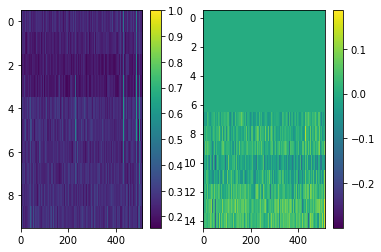

In [29]:
def make_frames(movie, l=4):
    #print(movie.shape)
    frame = [movie[0]]
    for m_frame in movie[1:]:
        frame.append(m_frame[-1][np.newaxis,...])
    #print([m.shape for m in frame])
    frame = np.concatenate(frame, axis=0).squeeze()
    return frame
which = 50019
track = movie_batch[which][:4, ::, ::, ::]
for j in range(8):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)
    print(track.shape)
    
track2 = movie_batch[which][::, ::, ::, ::]
GT = make_frames(track2)
pred = make_frames(track)
print(GT.shape, pred.shape)
plt.figure()
plt.subplot(121)
plt.imshow(GT[:10], aspect='auto')
plt.colorbar()
plt.subplot(122)
plt.imshow(pred-GT, aspect='auto')
plt.colorbar()
plt.show()

In [35]:
!mv ../Convolutional-LSTM-in-Tensorflow/training_data/ ../Convolutional-LSTM-in-Tensorflow/Data/